In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

dataset = load_dataset("aai530-group6/ddxplus")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
import pandas as pd

In [5]:
df_tr = pd.DataFrame(dataset["train"])
df_te = pd.DataFrame(dataset["test"])
df_va = pd.DataFrame(dataset["validate"])

In [6]:
df = pd.concat([df_tr, df_te, df_va])

In [7]:
df = df.reset_index()
del df["index"]

In [8]:
df.loc[df["SEX"] == "M", "SEX"] = 1
df.loc[df["SEX"] == "F", "SEX"] = 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292579 entries, 0 to 1292578
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   AGE                     1292579 non-null  int64 
 1   DIFFERENTIAL_DIAGNOSIS  1292579 non-null  object
 2   SEX                     1292579 non-null  object
 3   PATHOLOGY               1292579 non-null  object
 4   EVIDENCES               1292579 non-null  object
 5   INITIAL_EVIDENCE        1292579 non-null  object
dtypes: int64(1), object(5)
memory usage: 59.2+ MB


In [10]:
df.describe()

,AGE
count,1.292579e+06
mean,3.972967e+01
std,2.272213e+01
min,0.000000e+00
25%,2.200000e+01
50%,3.900000e+01
75%,5.600000e+01
max,1.090000e+02


In [11]:
import ast
df["EVIDENCES"] = df["EVIDENCES"].apply(lambda x: ast.literal_eval(x))

In [12]:
df["DIFFERENTIAL_DIAGNOSIS"] = df["DIFFERENTIAL_DIAGNOSIS"].apply(lambda x: ast.literal_eval(x))

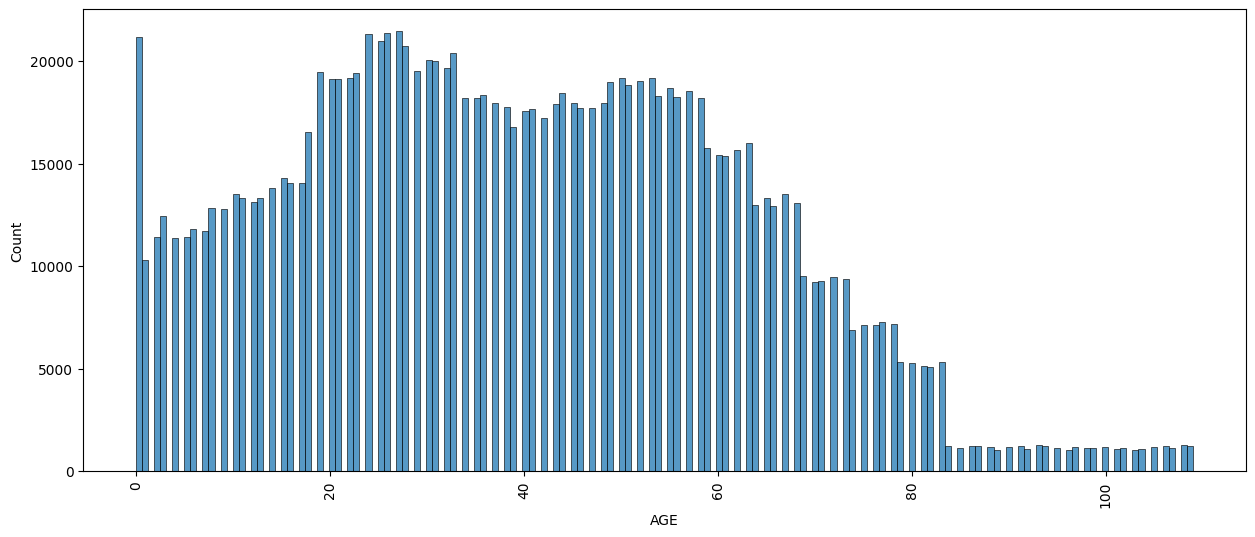

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.histplot(df["AGE"])
plt.xticks(rotation=90)
plt.show()

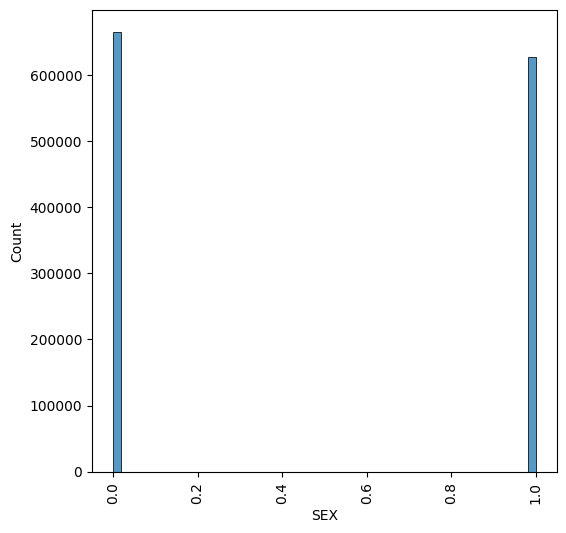

In [15]:
plt.figure(figsize=(6, 6))
sns.histplot(df["SEX"])
plt.xticks(rotation=90)
plt.show()

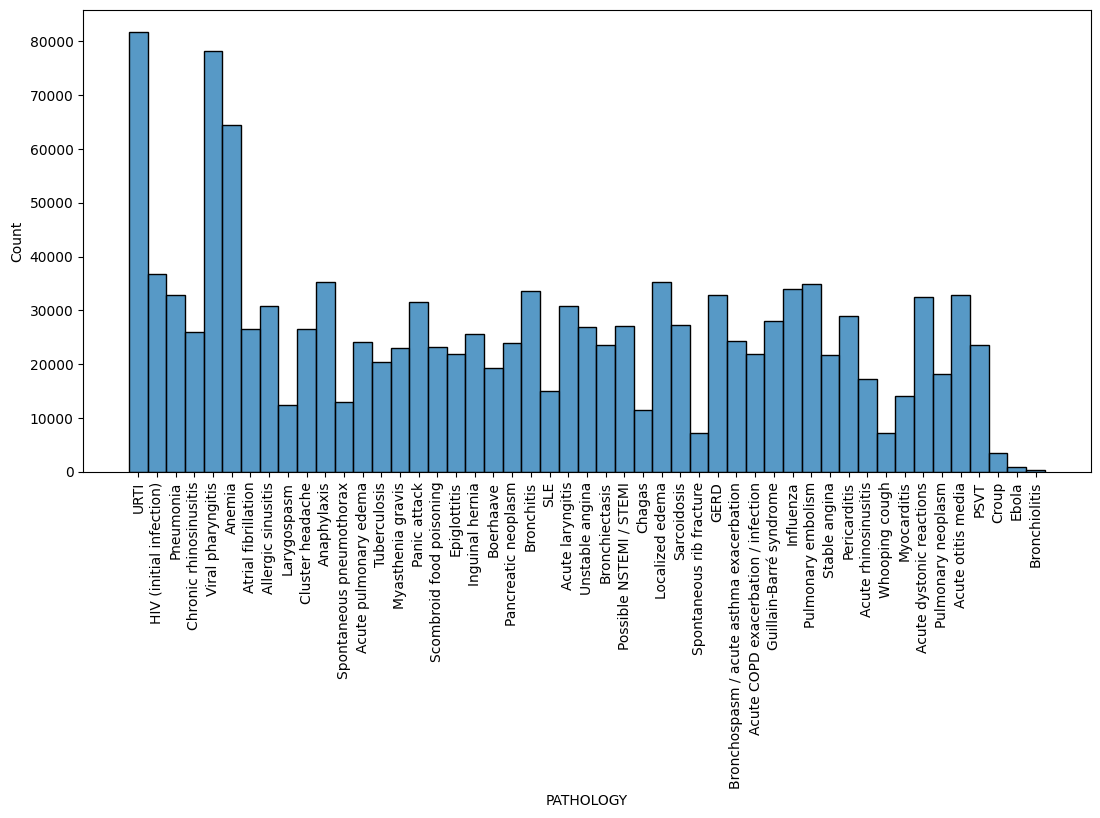

In [18]:
plt.figure(figsize=(13, 6))
sns.histplot(df["PATHOLOGY"])
plt.xticks(rotation=90)
plt.show()

In [19]:
df.shape

(1292579, 6)

In [20]:
df.to_csv('drive/MyDrive/disease/data.csv')